<a href="https://colab.research.google.com/github/Shubhankitsirvaiya/Airbnb/blob/main/Complete_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#Getting the Data and Importing Libraries

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

In [31]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Taking a Snapshot of Complete Data!!!
lets see what we got!!

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Correlation of each field

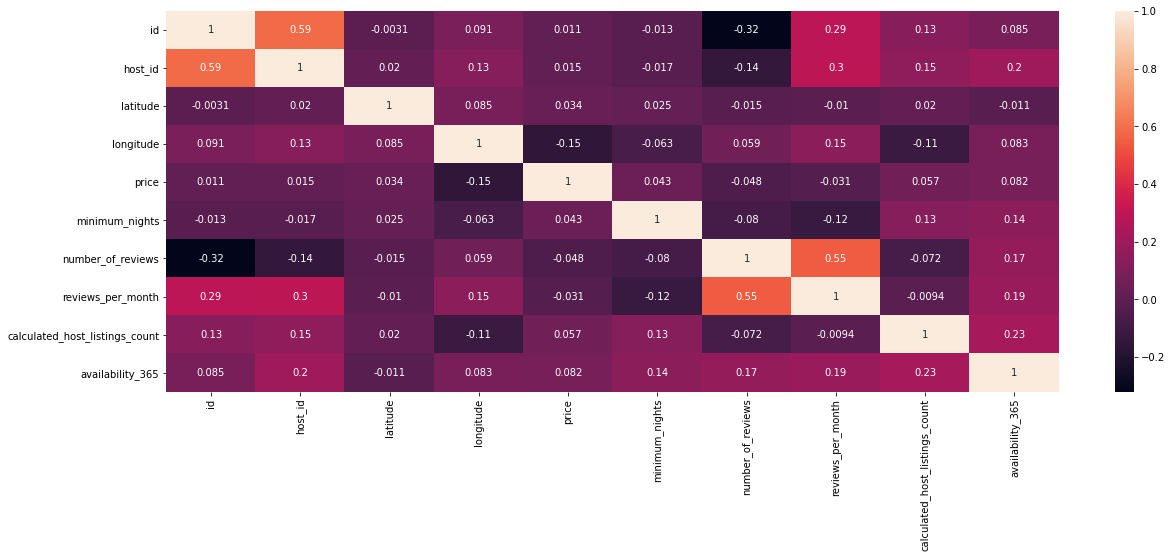

In [33]:
plt.figure(figsize=(20,7))
corr_=df.corr()
sns.heatmap(corr_,annot=True)

**So here we can infer that no two columns are highly correlated**

# Comparasion of number of property in each neighbourhood group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys
No handles with labels found to put in legend.


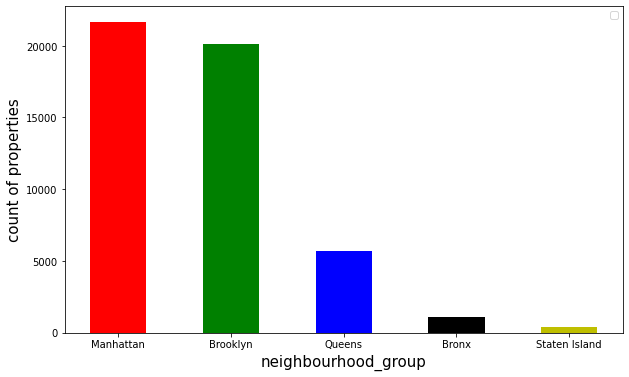

In [34]:
property_count=df['neighbourhood_group'].value_counts().reset_index()
w=0.5
 
plt.figure(figsize=(10,6))

bar1=np.arange(5)
plt.bar(bar1,property_count['neighbourhood_group'],w,color='rgbkymc')
plt.xlabel('neighbourhood_group',size=15)
plt.ylabel('count of properties',size=15)
plt.title('',size=20)
plt.xticks(bar1,property_count['index'])
plt.legend()

 
plt.show()



**From above plot we can conclude than most number of properties are in Manhatan and Brookyln reason behind this is demand in this two neighbourhood group is high.**




# Comparasion of number of reviews in each neighbourhood group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
No handles with labels found to put in legend.


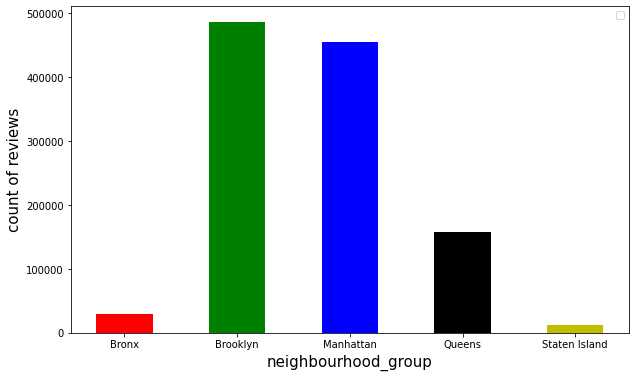

In [35]:
review=df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
w=0.5
 

plt.figure(figsize=(10,6))

bar1=np.arange(5)
plt.bar(bar1,review['number_of_reviews'],w,color='rgbkymc')
plt.xlabel('neighbourhood_group',size=15)
plt.ylabel('count of reviews',size=15)
plt.title('',size=20)
plt.xticks(bar1,review['neighbourhood_group'])
plt.legend()

 
plt.show()

**More number of reveiws are available for Brooklyn and Manhatan and Very less for Staten Island and bronx**

We can relate this analysis for number of customers ,considering same customer behaviour towards reviews across all groups

# Making minimum night category

**We can utilize the miminum night column but is has would be easier if we first convert it to categorical column**

---



In [36]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
def minimum_night_cat(x):
  if x==1:
    return 'one day'
  if x>1 and x<=3:
    return '2-3 days'
  if x>3 and x<7:
    return 'few days'
  elif x==7:
    return '1 week'
  elif x>7 and x<=29:
    return 'less than 1 month'
  elif x==30:
    return '1 month'
  elif x>30 and x<180:
    return 'more than a month'
  elif x>=180 and x<=365:
    return 'more than half year'
  elif x>365:
    return 'more than a year'
df['minimum_night_cat']=df['minimum_nights'].apply(minimum_night_cat)


In [38]:

d=pd.DataFrame(df.groupby('minimum_night_cat')['id'].count()).rename({'id':'count'},axis=1).reset_index().sort_values('count',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
No handles with labels found to put in legend.


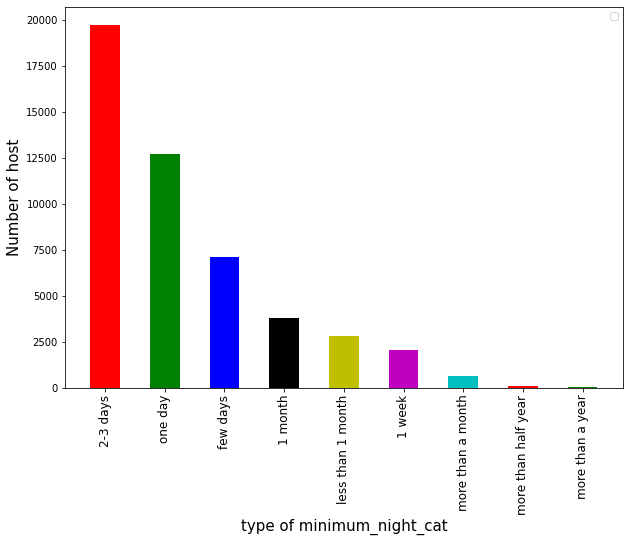

In [39]:

w=0.5
 

plt.figure(figsize=(10,7))

bar1=np.arange(9)
plt.bar(bar1,d['count'],w,color='rgbkymc')
plt.xlabel('type of minimum_night_cat',size=15)
plt.ylabel('Number of host',size=15)
plt.title('',size=20)
plt.xticks(bar1,d['minimum_night_cat'],rotation=90,fontsize=12)
plt.legend()

 
plt.show()

**Most of the host provide only one day minimum night stay**

In [40]:
df[df['minimum_night_cat']=='only one day']['neighbourhood_group'].value_counts()



Series([], Name: neighbourhood_group, dtype: int64)

**we can say that most of the one night stay occurs in manhatten and in brooklyn these trips based on thier minimum night stay can be buisness trips **

# Converting last review to datetime and taking month from it

Text(0, 0.5, 'number of host')

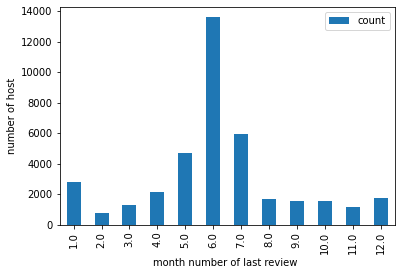

In [41]:
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['last_month']=df['last_review'].apply(lambda x: x.month)
pd.DataFrame(df.groupby('last_month')['host_id'].count()).rename({'host_id':'count'},axis=1).plot.bar()
plt.xlabel('month number of last review ',size=10)
plt.ylabel('number of host',size=10)


from here we can infer that assuming people give review after leaving the service most people leave/Change the peoperty in the 6 th month of the year

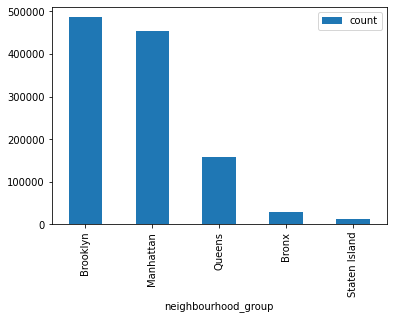

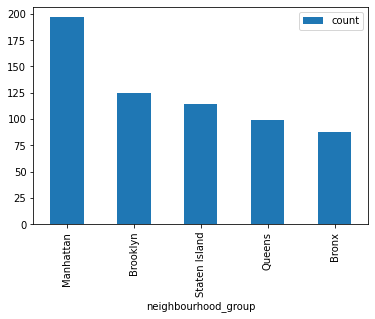

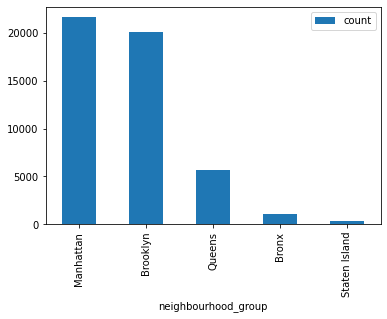

In [42]:
pd.DataFrame(df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)).rename({'number_of_reviews':'count'},axis=1).plot.bar()
## So brooklyl and Manhateten has most number of customers 

pd.DataFrame(df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)).rename({'price':'count'},axis=1).plot.bar()

pd.DataFrame(df.groupby('neighbourhood_group')['host_id'].count().sort_values(ascending=False)).rename({'host_id':'count'},axis=1).plot.bar()

**From above plots we can see that although demand(based on number of reviews) and supply(based on host_id) is similar for Manhatten and Brooklyn still the average price is very high in Manhatten**

we can look or reason for that!!


# Count of number of Properties in each type of room across different groups



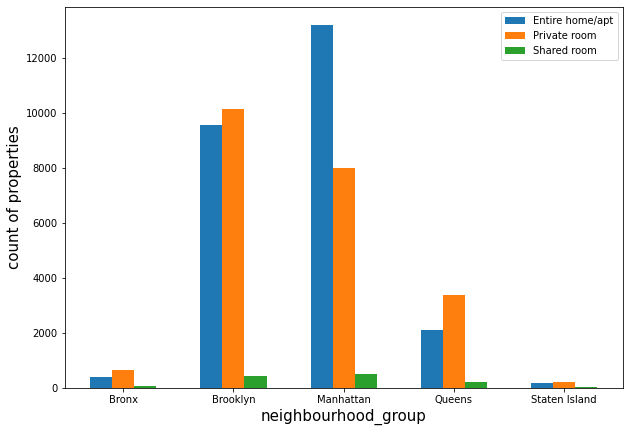

In [43]:
a=df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()

plt.figure(figsize=(10,7))
w=0.2           


bar1=np.arange(5)
bar2=[w+i for i in bar1]
bar3=[w+i for i in bar2]
plt.bar(bar1,list(a['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar2,list(a['Private room']),w,label='Private room')
plt.bar(bar3,list(a['Shared room']),w,label='Shared room')
              
plt.xlabel('neighbourhood_group',size=15)
plt.ylabel('count of properties',size=15)
plt.title('',size=20)
plt.xticks(bar1+2*w/2,a.index)
plt.legend()
              
plt.show()
                     



**From above plot we can conclude that Manhatan and Brooklyn have high  count of entire home/apt this may be because of bussiness meating or peoples are travling with theire family so host are giving entitehome/apt facilities.Thre are very less number of sheared rooms avilable in each neighbourhood groups**

# Mean price for each type of room across different neighbourhood groups

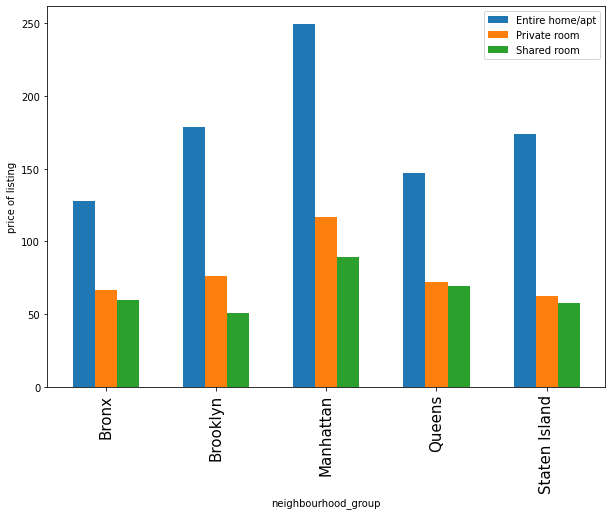

In [44]:
a=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

plt.figure(figsize=(10,7))
w=0.2           


bar1=np.arange(5)
bar2=[w+i for i in bar1]
bar3=[w+i for i in bar2]
plt.bar(bar1,list(a['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar2,list(a['Private room']),w,label='Private room')
plt.bar(bar3,list(a['Shared room']),w,label='Shared room')
              
plt.xlabel('neighbourhood_group',size=10)
plt.ylabel('price of listing',size=10)
plt.title('',size=20)
plt.xticks(bar1+2*w/2,a.index,rotation=90,fontsize=15)
plt.legend()
              
plt.show()
##following graph shows which room type has more price in specific neighbourhood groups.
              


**From above plot we can conclude that average price for entire home/apt is higher in all neighbourhood groups which is obivous. Average price of sheared rooms and private room somewhat look similar in Bronx,Queens,Staten Island.**

# We can Look into each Nieghbourhood Groups seperately to look deeper into subset Neighbours

In [45]:
def neighbourhood_group_subset(n):
  data=df[df['neighbourhood_group']==n]
  a=df[df['neighbourhood_group']==n]['neighbourhood'].value_counts().reset_index()
  a1=data[data['neighbourhood']==a['index'][0]]
  a2=data[data['neighbourhood']==a['index'][1]]
  a3=data[data['neighbourhood']==a['index'][2]]
  a4=data[data['neighbourhood']==a['index'][3]]
  a5=data[data['neighbourhood']==a['index'][4]]
  result=pd.concat([a1,a2,a3,a4,a5])
  return result

# we can use this function to make a subset of dataframe based on different neighbourhood groups
def room(room_types,neighbourhood_groups):
  a=neighbourhood_group_subset(neighbourhood_groups)
  return a[a['room_type']==room_types]

## this function can be used to slice the dataframe based on room type and neighbourhood group




## now we can add a one time function to plot the graph when we want to do neighboir hoood wise analysis


def plots(aa,var):       
          w = 0.20
          #plt.figsize(figure=(20,10))
          plt.figure(figsize=(10,7))
          


          bar1=np.arange(aa['neighbourhood'].shape[0])
          bar2=[w+i for i in bar1]
          bar3=[w+i for i in bar2]
          plt.bar(bar1,aa[var+'1'],w,label='private_room')
          plt.bar(bar2,aa[var+'2'],w,label="entire_room")
          plt.bar(bar3,aa[var +'3'],w,label="sheared_room")

          plt.xlabel('neighbourhood',size=10)
          plt.ylabel(var,size=10)
          plt.title('variation of  ' + var+'   wrt neighbourhood',size=20)
          plt.xticks(bar1+2*w/2,aa['neighbourhood'],fontsize=10)
          plt.legend()
          #plt.xticks(rotation=90)
          plt.show()
          #ptl.xticks(bar1+w/2,df['month_number'])



1.Brokeyan

In [46]:

private_room_df=room('Private room','Brooklyn')
entire_home_df=room('Entire home/apt','Brooklyn')
shared_room_df=room('Shared room','Brooklyn')

In [47]:
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)


####looking for specific neighbourhood in Broklyn ,in each room type 
# for example in a we will have Dataframe which give us the mean price in each neighbourhood group in brooklyn for private room type.
a.head()

,neighbourhood,price1
0,Bedford-Stuyvesant,73.296860
1,Bushwick,62.623037
2,Crown Heights,68.573077
3,Greenpoint,88.462185
4,Williamsburg,85.761142


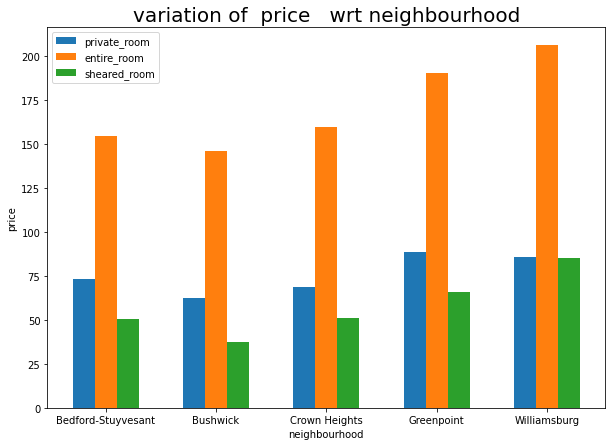

In [48]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')


**From above plot we can conclude that for each room type Williamsburg have highest average price.For each room type price is varying accordinng to neighbourhood.These may be because of servise or neighbourhood .**

In [49]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

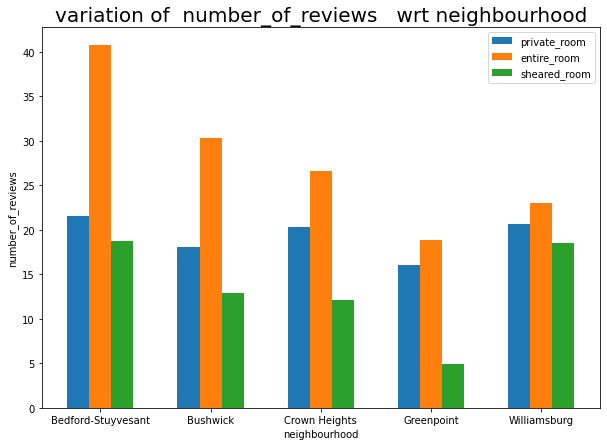

In [50]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

**From above we can conclude that Most of the reviews are for entire room .Williamberg have highest price for entire room but less reviews compare to others.revesre thing for Bedford Stuyvesant.**

###2.Manhattan

In [51]:
private_room_df=room('Private room','Manhattan')
entire_home_df=room('Entire home/apt','Manhattan')
shared_room_df=room('Shared room','Manhattan')

In [52]:
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

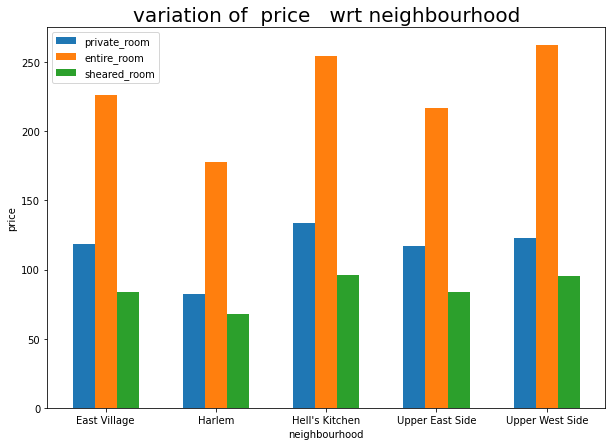

In [53]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')


**Private room price is high in all neighbourhoods.Hell's Kitchen Harlem have highest and lowest price respectivaly for all rrom type .**

In [54]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

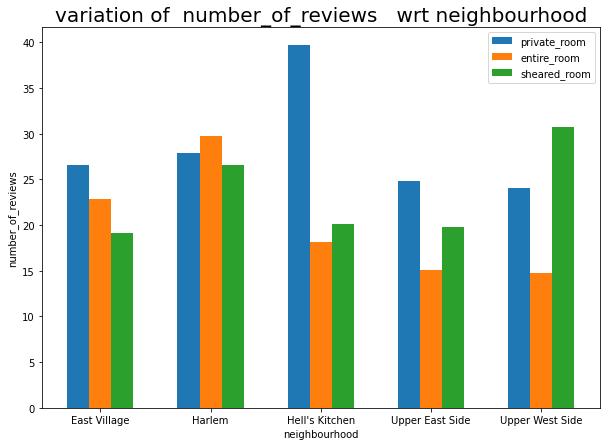

In [55]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

**From above plot and price plot it look's like where price is high review for that room type is low**

###Queens

In [56]:
private_room_df=room('Private room','Queens')
entire_home_df=room('Entire home/apt','Queens')
shared_room_df=room('Shared room','Queens')

In [57]:
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

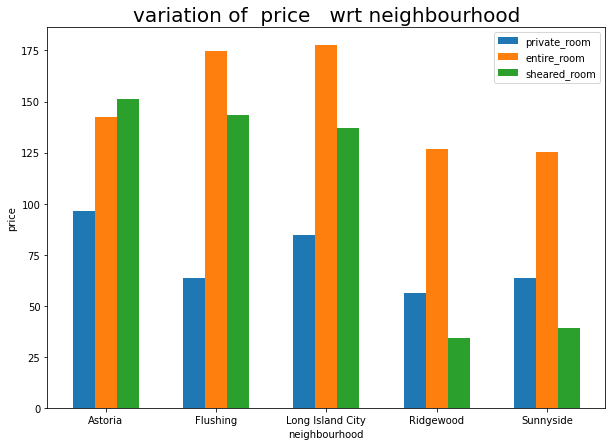

In [58]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')

**Maximum price is quite less compare to Manhatan and Brooklyen.In Astoria ,Flushing,Long Island City price for sheared room is high compare to others this may be due to service.**

In [59]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

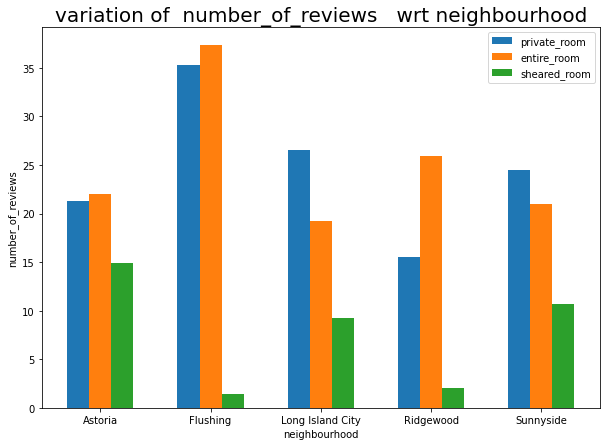

In [60]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

**Reviews for entire room are look good because price is quite less compare to Manhatan and Brookelyn**

###Staten Island

In [61]:

private_room_df=room('Private room','Staten Island')
entire_home_df=room('Entire home/apt','Staten Island')
shared_room_df=room('Shared room','Staten Island')

In [62]:
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

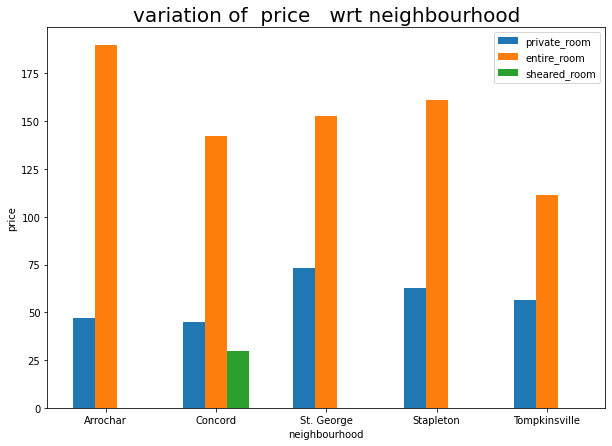

In [63]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')

**In Staten Island price for private rooms looks very less for all neighbourhood.Shear rooms are not available in most of the neighbourhhod.**

In [64]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

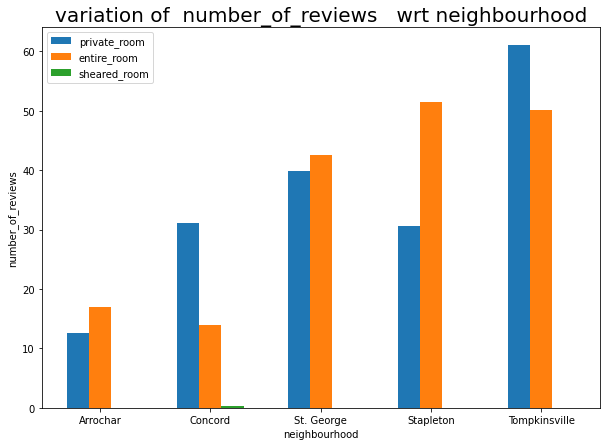

In [65]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

**Tompkinsville has highest number of reviews looks like  this is becacse of price.**

###Bronx

In [66]:

private_room_df=room('Private room','Bronx')
entire_home_df=room('Entire home/apt','Bronx')
shared_room_df=room('Shared room','Bronx')

In [67]:
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

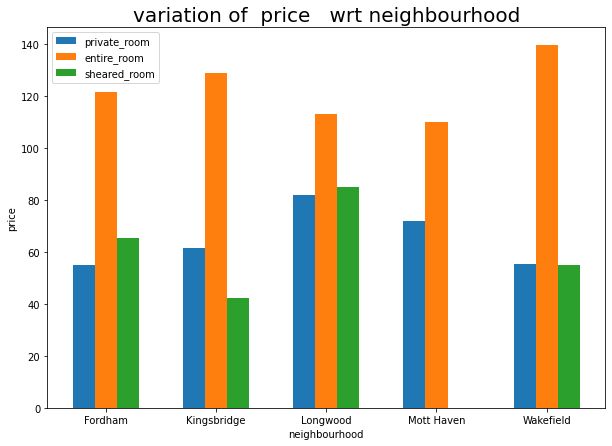

In [68]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')

**average Maximum price for entire room is very less compare to others neighbourshood group.**

In [69]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

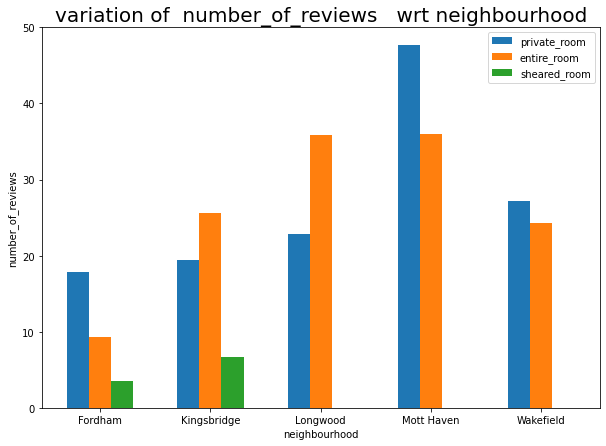

In [70]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

**Almost all rewies for entire home and private room, becaues of low price people are prefering entire home and private room.**

###Count of properties availabel in different price range in  each neighboorhood

In [71]:
bins=[0,80,200,10000]

In [72]:
count_df=df.groupby(['neighbourhood_group',pd.cut(df.price,bins)])['room_type'].value_counts().unstack().fillna(0).reset_index()
count_df

room_type,neighbourhood_group,price,Entire home/apt,Private room,Shared room
0,Bronx,"(0, 80]",108.0,567.0,54.0
1,Bronx,"(80, 200]",235.0,76.0,5.0
2,Bronx,"(200, 10000]",36.0,8.0,1.0
3,Brooklyn,"(0, 80]",810.0,7654.0,366.0
4,Brooklyn,"(80, 200]",6845.0,2326.0,39.0
5,Brooklyn,"(200, 10000]",1903.0,146.0,6.0
6,Manhattan,"(0, 80]",338.0,3383.0,342.0
7,Manhattan,"(80, 200]",7466.0,4084.0,110.0
8,Manhattan,"(200, 10000]",5394.0,515.0,28.0
9,Queens,"(0, 80]",354.0,2720.0,177.0


In [73]:
def get_plot(ngh_grp,a=count_df):
  
            data=a[a['neighbourhood_group']==ngh_grp]
            w=0.15
            plt.figure(figsize=(10,5))
            bar1=np.arange(data['Entire home/apt'].shape[0])
            bar2=[w+i for i in bar1]
            bar3=[w+i for i in bar2]
            plt.bar(bar1,data['Entire home/apt'],w,label='Entire home/apt')
            plt.bar(bar2,data['Private room'],w,label='Private room')
            plt.bar(bar3,data['Shared room'],w,label='Shared room')
                          
            plt.xlabel('price',size=10)
            plt.ylabel('count',size=10)
            plt.title(ngh_grp,size=20)
            plt.xticks(bar1+2*w/2,['low price range(0, 80]','Medium pricerange(80, 200]','Expensive above 200'],fontsize=10)
            plt.legend()
                          
            plt.show()
                          

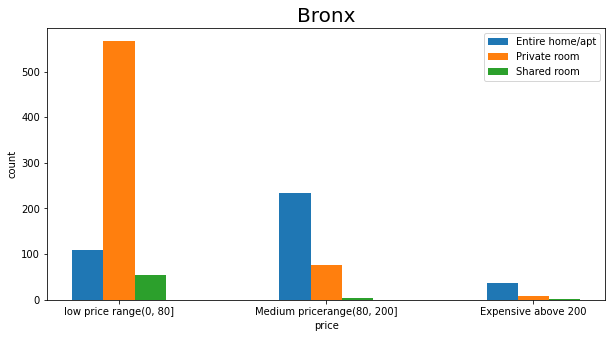

In [74]:
get_plot('Bronx')

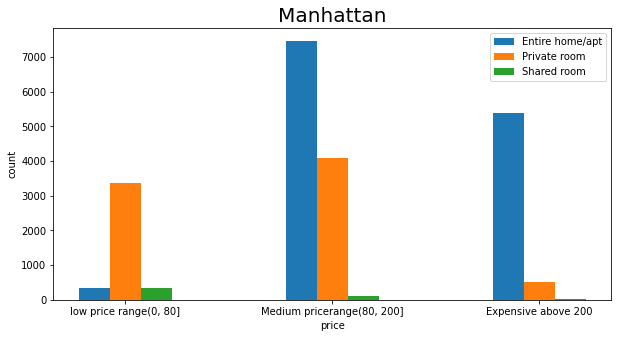

In [75]:
get_plot('Manhattan')

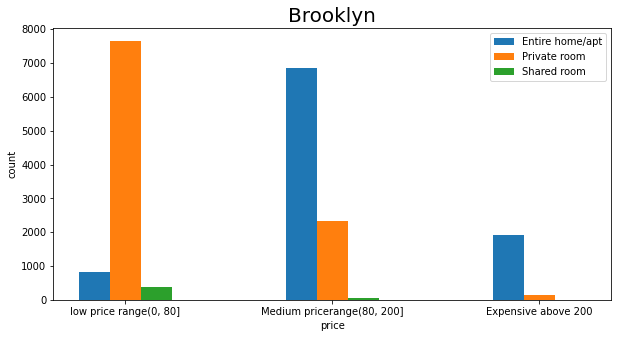

In [76]:
get_plot('Brooklyn')

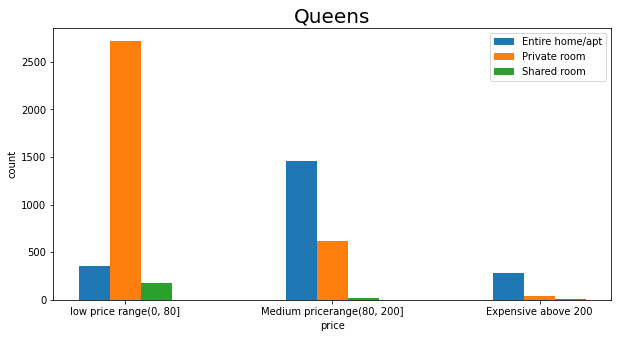

In [77]:
get_plot('Queens')

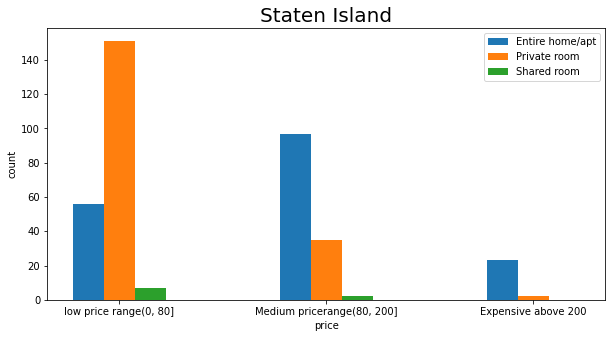

In [78]:
get_plot('Staten Island')

From all plots we can conclude that less number of 

In [79]:
a=df.groupby([pd.cut(df.price,bins)])['neighbourhood_group'].value_counts().unstack().fillna(0).reset_index()
a

neighbourhood_group,price,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,"(0, 80]",729,8830,4063,3251,214
1,"(80, 200]",316,9210,11660,2093,134
2,"(200, 10000]",45,2055,5937,322,25


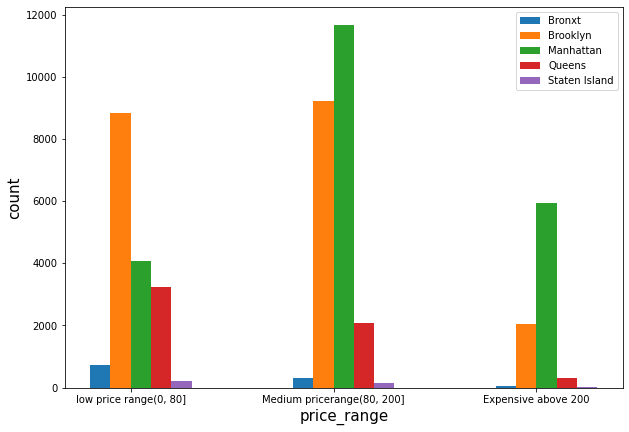

In [80]:

plt.figure(figsize=(10,7))
w=0.10       


bar1=np.arange(3)
bar2=[w+i for i in bar1]
bar3=[w+i for i in bar2]
bar4=[w+i for i in bar3]
bar5=[w+i for i in bar4]
plt.bar(bar1,list(a['Bronx']),w,label='Bronxt')
plt.bar(bar2,list(a['Brooklyn']),w,label='Brooklyn')
plt.bar(bar3,list(a['Manhattan']),w,label='Manhattan')
plt.bar(bar4,list(a['Queens']),w,label='Queens')
plt.bar(bar5,list(a['Staten Island']),w,label='Staten Island')
              
plt.xlabel('price_range',size=15)
plt.ylabel('count',size=15)
plt.title('',size=20)
plt.xticks(bar1+3*w/2,['low price range(0, 80]','Medium pricerange(80, 200]','Expensive above 200'],fontsize=10)
plt.legend()
              
plt.show()

#Identify High Demand areas where AIRBNB should increase supply

In [81]:
new_props = df.groupby(['neighbourhood_group','neighbourhood']).agg({'availability_365':'median','host_id':'count'}).reset_index().sort_values(by=['availability_365'])
new_props = new_props[new_props['host_id']>=5]
new_props.head(20)

,neighbourhood_group,neighbourhood,availability_365,host_id
68,Brooklyn,Downtown Brooklyn,0.0,83
83,Brooklyn,Navy Yard,0.0,14
119,Manhattan,Stuyvesant Town,0.0,37
117,Manhattan,Roosevelt Island,0.0,77
113,Manhattan,Morningside Heights,0.0,346
88,Brooklyn,Sea Gate,0.0,7
95,Manhattan,Battery Park City,0.0,70
116,Manhattan,Nolita,3.0,253
100,Manhattan,East Village,3.0,1853
93,Brooklyn,Williamsburg,3.5,3920


In [82]:
#df = df[df['availability_365'] > 100]
new_props = df.groupby(['neighbourhood_group','neighbourhood','room_type']).agg({'availability_365':'median','host_id':'count','price':'median'}).reset_index().sort_values(by=['availability_365'])
new_props = new_props[new_props['host_id']>=5]
new_props.head(20)

,neighbourhood_group,neighbourhood,room_type,availability_365,host_id,price
295,Manhattan,Morningside Heights,Entire home/apt,0.0,150,130.0
290,Manhattan,Marble Hill,Entire home/apt,0.0,5,90.0
282,Manhattan,Kips Bay,Private room,0.0,112,99.0
33,Bronx,Fieldston,Private room,0.0,7,64.0
157,Brooklyn,Cobble Hill,Private room,0.0,22,81.0
270,Manhattan,Greenwich Village,Private room,0.0,99,110.0
268,Manhattan,Gramercy,Shared room,0.0,5,69.0
171,Brooklyn,Downtown Brooklyn,Entire home/apt,0.0,52,161.0
260,Manhattan,East Village,Shared room,0.0,23,75.0
259,Manhattan,East Village,Private room,0.0,660,95.0


Aggregating the median of available days, count of host_id’s and median of price over a group of neighborhood groups, neighborhood and room types, we see that even though total hosts and prices are high, availability is 0 for these are 0 in high demand areas like Manhattan and Brooklyn.
From a previous plot and this table, we can infer that customers in these high demand areas prefer to stay in either private rooms or Entire home/apt as compared to shared rooms.


There are two insights we can infer from the above:

There is a gap in demand and supply for room types : private rooms, Entire home/apt in high demand areas. Since the price for such listings is also high, we can introduce some initiative to get more private rooms or entire home type Airbnb’s registered in these neighborhoods which will help in increasing the overall revenue.

Since customers in these neighborhood groups prefer to stay in private or entire home type Airbnb’s, we can also push for an initiative where some of the shared Airbnb’s could be converted to the other two room types to get more crowd.


# Marketing + Discounts (People can travel extra to stay here)

In [84]:
marketing_df = df.groupby(['neighbourhood_group','neighbourhood']).agg({'availability_365':'median','host_id':'count'}).reset_index().sort_values(by=['availability_365'],ascending=False)
marketing_df = marketing_df[marketing_df['host_id']>=5]
marketing_df.head(20)

,neighbourhood_group,neighbourhood,availability_365,host_id
12,Bronx,Eastchester,359.0,13
205,Staten Island,Randall Manor,340.0,19
17,Bronx,Hunts Point,330.5,18
138,Queens,Corona,324.5,64
184,Staten Island,Concord,320.0,26
142,Queens,Edgemere,313.0,11
133,Queens,Bellerose,311.5,14
217,Staten Island,West Brighton,310.5,18
46,Bronx,Williamsbridge,307.5,40
48,Brooklyn,Bath Beach,306.0,17


In [85]:
marketing_df = df.groupby(['neighbourhood_group','neighbourhood','room_type']).agg({'availability_365':'median','host_name':'count','price':'median'}).reset_index().sort_values(by=['availability_365'],ascending=False)
marketing_df = marketing_df[marketing_df['host_name']>=5]
marketing_df.head(20)

,neighbourhood_group,neighbourhood,room_type,availability_365,host_name,price
178,Brooklyn,East Flatbush,Shared room,365.0,24,34.5
444,Queens,South Ozone Park,Shared room,365.0,8,30.0
28,Bronx,Eastchester,Private room,364.0,6,68.0
437,Queens,Ridgewood,Shared room,361.5,10,31.5
27,Bronx,Eastchester,Entire home/apt,358.5,6,202.5
137,Brooklyn,Borough Park,Shared room,357.0,16,35.0
511,Staten Island,Randall Manor,Private room,355.0,9,55.0
362,Queens,Corona,Shared room,354.0,24,27.5
507,Staten Island,Port Richmond,Private room,353.0,6,48.5
17,Bronx,Clason Point,Private room,349.0,11,70.0


We can infer that it is expected there will be fewer customers for areas like Bronx and Staten Island, since it is away from the city center.
We can introduce some discounts on listings in these neighborhood groups which might attract a crowd and might help in revenue generation.



In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()